# EDA_factores_nivel_ingresos Analisis univariante

In [1]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os

# Add src folder to Python path
sys.path.append(os.path.abspath(".."))

In [3]:
from utils import funciones
from utils import bootcampviztools
from utils.funciones import variabilidad
from utils.bootcampviztools import pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_categorical_relationship_fin, plot_multiple_boxplots, plot_combined_graphs, plot_grouped_boxplots,plot_grouped_histograms

In [4]:
# Load dataset
df_adult_clean = pd.read_csv("../data/adult_clean.csv")

In [5]:
df_adult_clean.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,recode_never_worked,had_missing_cat
0,90,unknown,HS-grad,9,Widowed,unknown,Not-in-family,White,Female,0,4356,40,United-States,<=50K,False,True
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,False,False
2,66,unknown,Some-college,10,Widowed,unknown,Unmarried,Black,Female,0,4356,40,United-States,<=50K,False,True
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,False,False
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,False,False


In [6]:
df_tipificacion = pd.DataFrame([df_adult_clean.nunique(), df_adult_clean.nunique()/len(df_adult_clean) * 100, df_adult_clean.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion

,Card,%_Card,Tipo
age,73,0.22436,int64
workclass,8,0.024587,object
education,16,0.049175,object
education.num,16,0.049175,int64
marital.status,7,0.021514,object
occupation,15,0.046101,object
relationship,6,0.018441,object
race,5,0.015367,object
sex,2,0.006147,object
capital.gain,119,0.365737,int64


In [7]:
df_tipificacion["Clasificada_como"] = "Categorica" # Partiendo de que casi todas parecen categóricas
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
age,73,0.22436,int64,Numerica Discreta
workclass,8,0.024587,object,Categorica
education,16,0.049175,object,Numerica Discreta
education.num,16,0.049175,int64,Numerica Discreta
marital.status,7,0.021514,object,Categorica
occupation,15,0.046101,object,Numerica Discreta
relationship,6,0.018441,object,Categorica
race,5,0.015367,object,Categorica
sex,2,0.006147,object,Binaria
capital.gain,119,0.365737,int64,Numerica Discreta


**Dataset:**  adult_clean.csv

**Descripción:**  El Adult Census Dataset contiene información demográfica, educativa y laboral de individuos adultos en Estados Unidos, utilizada para analizar su relación con el nivel de ingresos (≤$50K o >$50K).

**Periodo:**  1994

| Nombre del campo| Descripción| Tipo de variable | Importancia Inicial | Notas |
|-----------------|------------|------------------|---------------------|-------|
| age | Edad de la persona|Numerica discreta| 1 | 
| workclass | Tipo de empleo (privado, autónomo, etc.)| Categorica| 1 | Contiene valores "Unknown" que representan filas con datos faltantes o “never worked”; categorías estandarizadas.
| education | Nivel educativo alcanzado| Categorica | 1 | Categorías consistentes; se puede usar tal cual para análisis.
| education.num | Codificación numérica del nivel educativo| Categorica | 1 | Correlacionada directamente con education; representa años de educación.
| marital.status | Estado civil| Categorica | 3 | Categorías limpias; algunas combinaciones pueden ser raras (ej. “Married-spouse-absent”).
| occupation | Categoría profesional| Categorica | 1 | Contiene "unknown" para valores faltantes; algunas categorías muy poco frecuentes podrían agruparse en “Other” si es necesario.
| relationship | Relación familiar| Categorica | 2 | Categorías limpias; refleja relación familiar en el hogar.
| race | Categoría racial| Categorica | 1 | Distribución desigual: la mayoría White; las minorías pueden agruparse como “Other” para visualización.
| sex | Hombre o mujer| Binaria | 1 | Binaria: Male/Female; no requiere limpieza.
| capital.gain | Ganancias de capital| Numerica discreta | 2 | Muy sesgado, con muchos ceros; considerar log-transform o categorizar si se usa en análisis.
| capital.loss | Pérdidas de capital| Numerica discreta | 2 | Similar a capital-gain: muchos ceros, sesgado; podría agruparse o transformarse.
| hours.per.week | Horas trabajadas por semana | Numerica discreta | 1 | 
| native.country | País de origen| Categorica | 1 | La mayoría United-States; países raros se pueden agrupar en “Other”.
| income | Variable objetivo: ≤50K o >50K| Binaria | 0 | Variable objetivo binaria; no requiere limpieza adicional.

# Analysis Univariante variables categoricas

In [8]:
df_adult_clean.mode()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,recode_never_worked,had_missing_cat
0,36,Private,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K,False,False


In [9]:
columnas_categoricas = ["income","workclass","education","marital.status","occupation","relationship","race","sex","native.country"]
columnas_numericas = ["age","hours.per.week","education.num","capital.gain","capital.loss"]

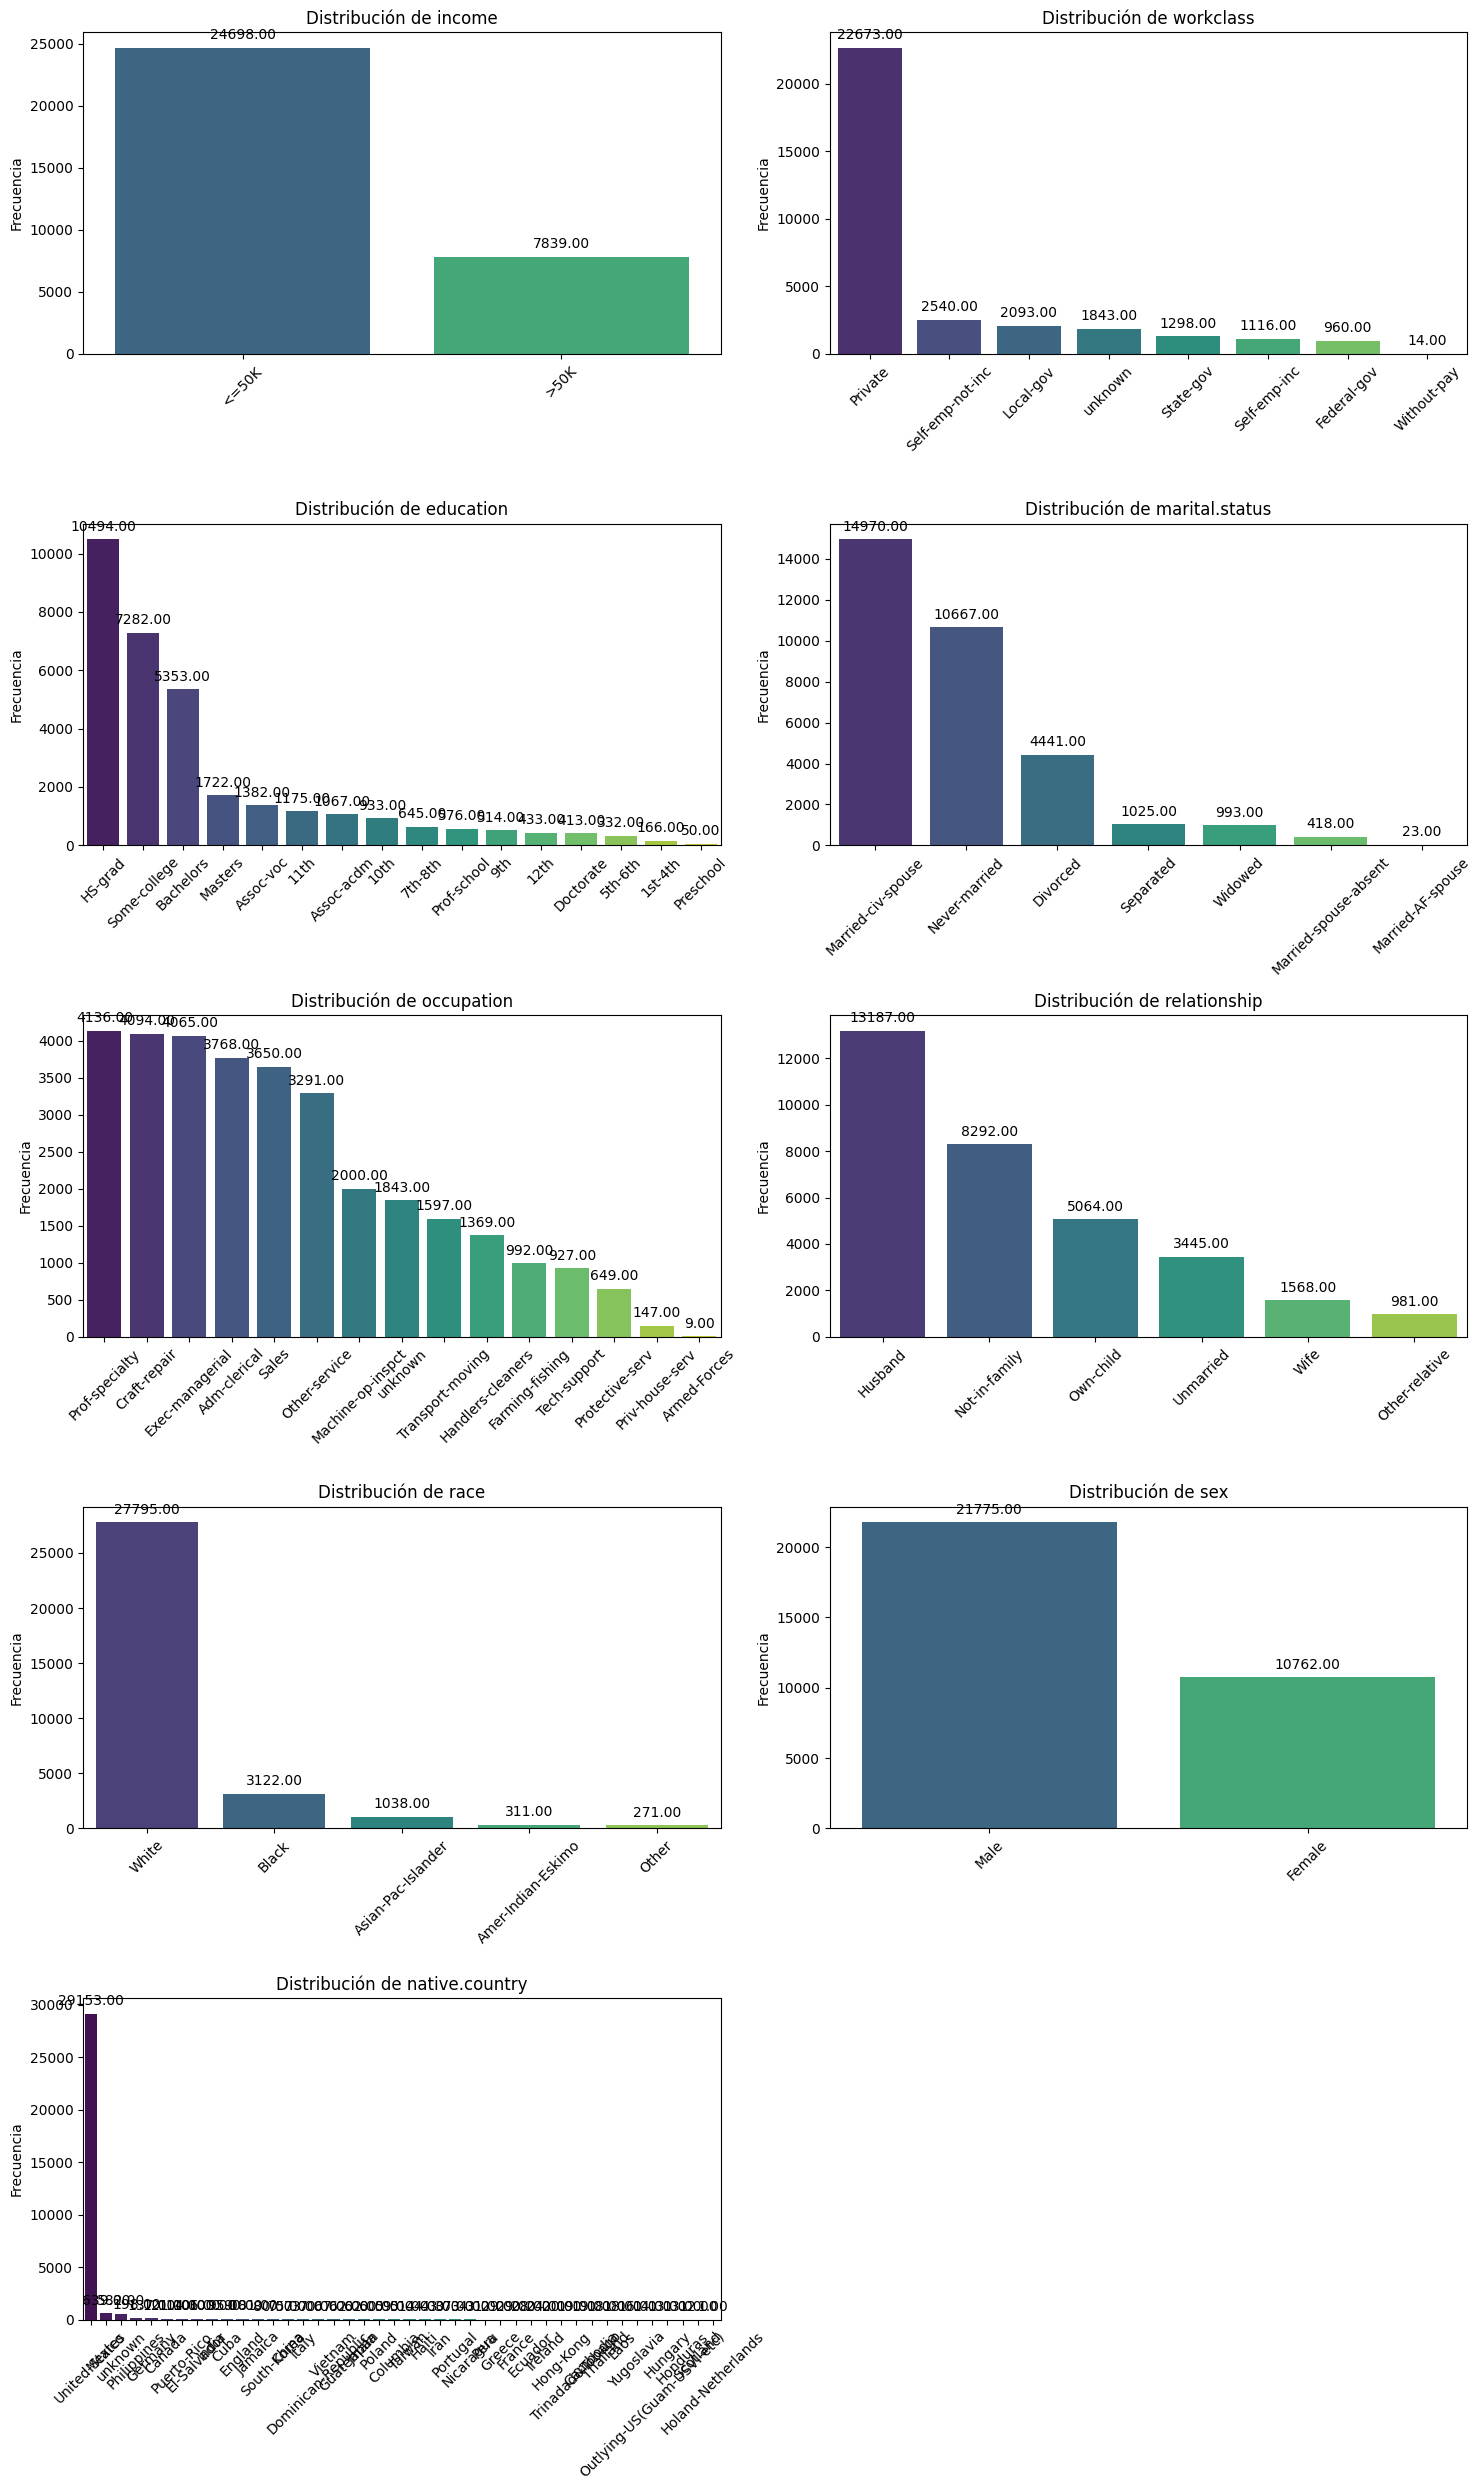

In [10]:
pinta_distribucion_categoricas(df_adult_clean,columnas_categoricas, mostrar_valores=True)

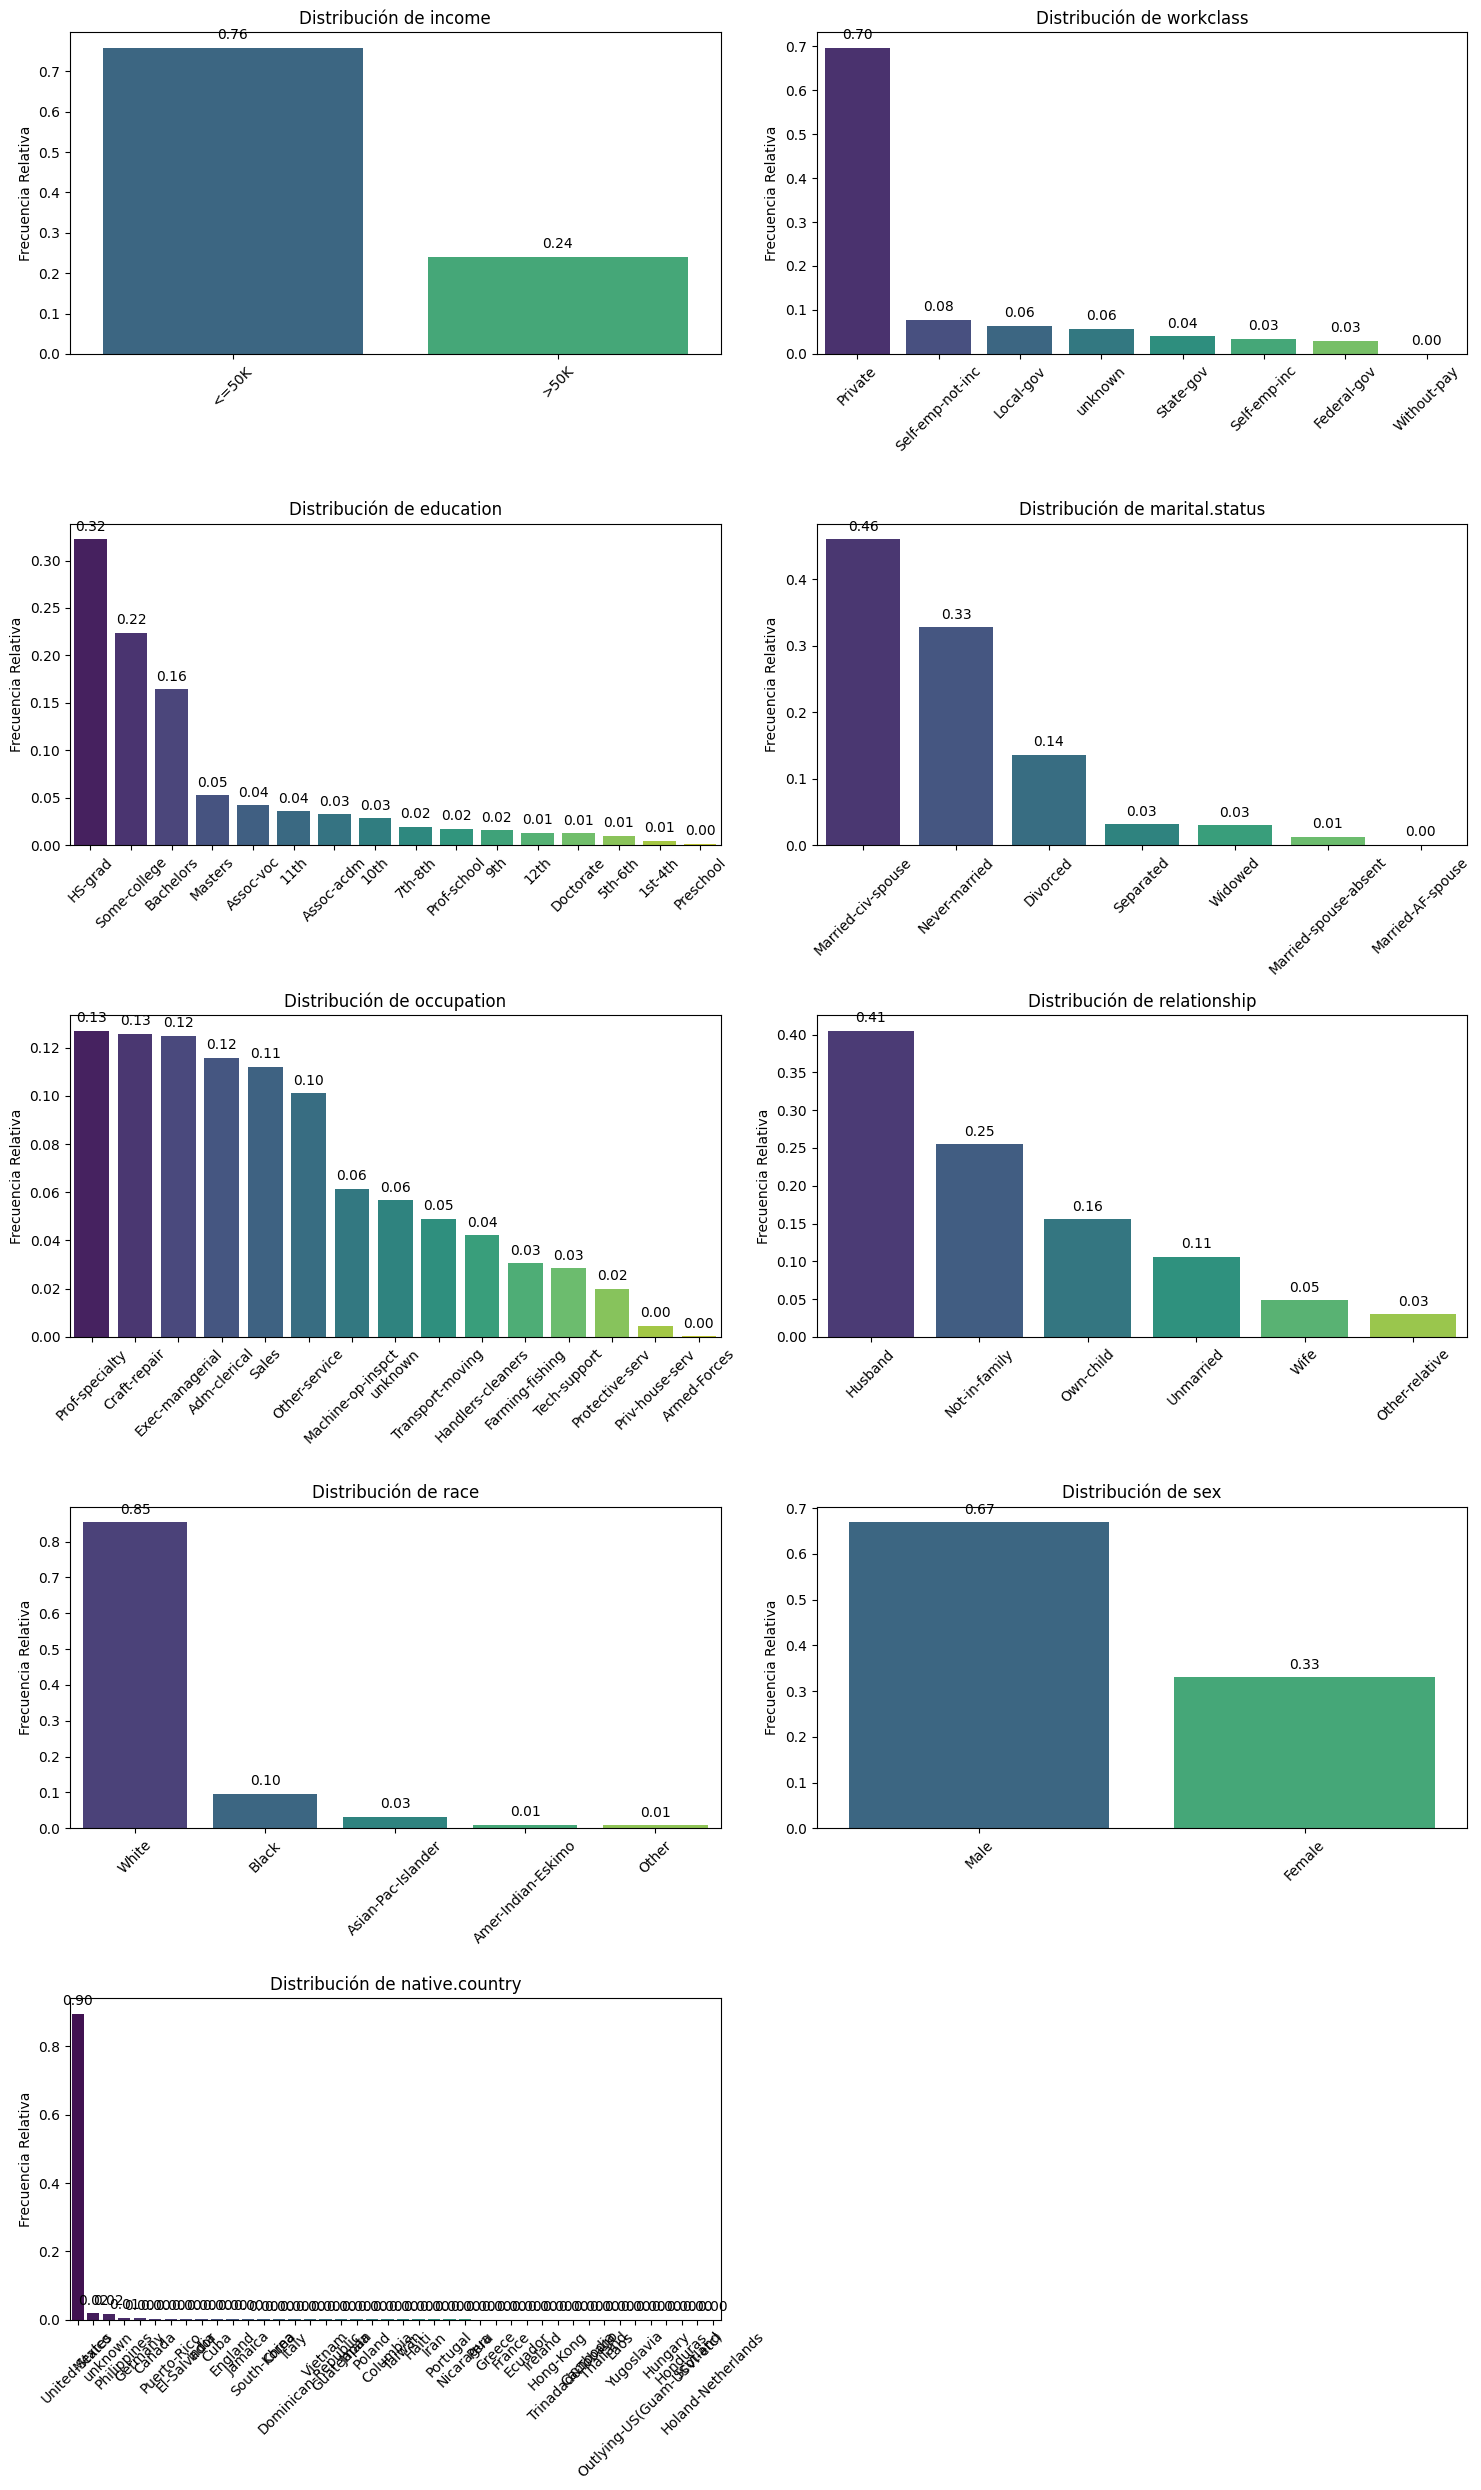

In [11]:
pinta_distribucion_categoricas(df_adult_clean,columnas_categoricas, relativa=True, mostrar_valores=True)

In [12]:
# Treat "native country" variable and create two categories; United-States and Other.
df_adult_clean["native.country"] = ["United-States" if x == "United-States" else "Other" for x in df_adult_clean["native.country"]]

In [13]:
# Treat "race" variable; create three categories; "White","Black" and "Other"
df_adult_clean["race"] = df_adult_clean["race"].replace({"Asian-Pac-Islander":"Other","Amer-Indian-Eskimo":"Other"})

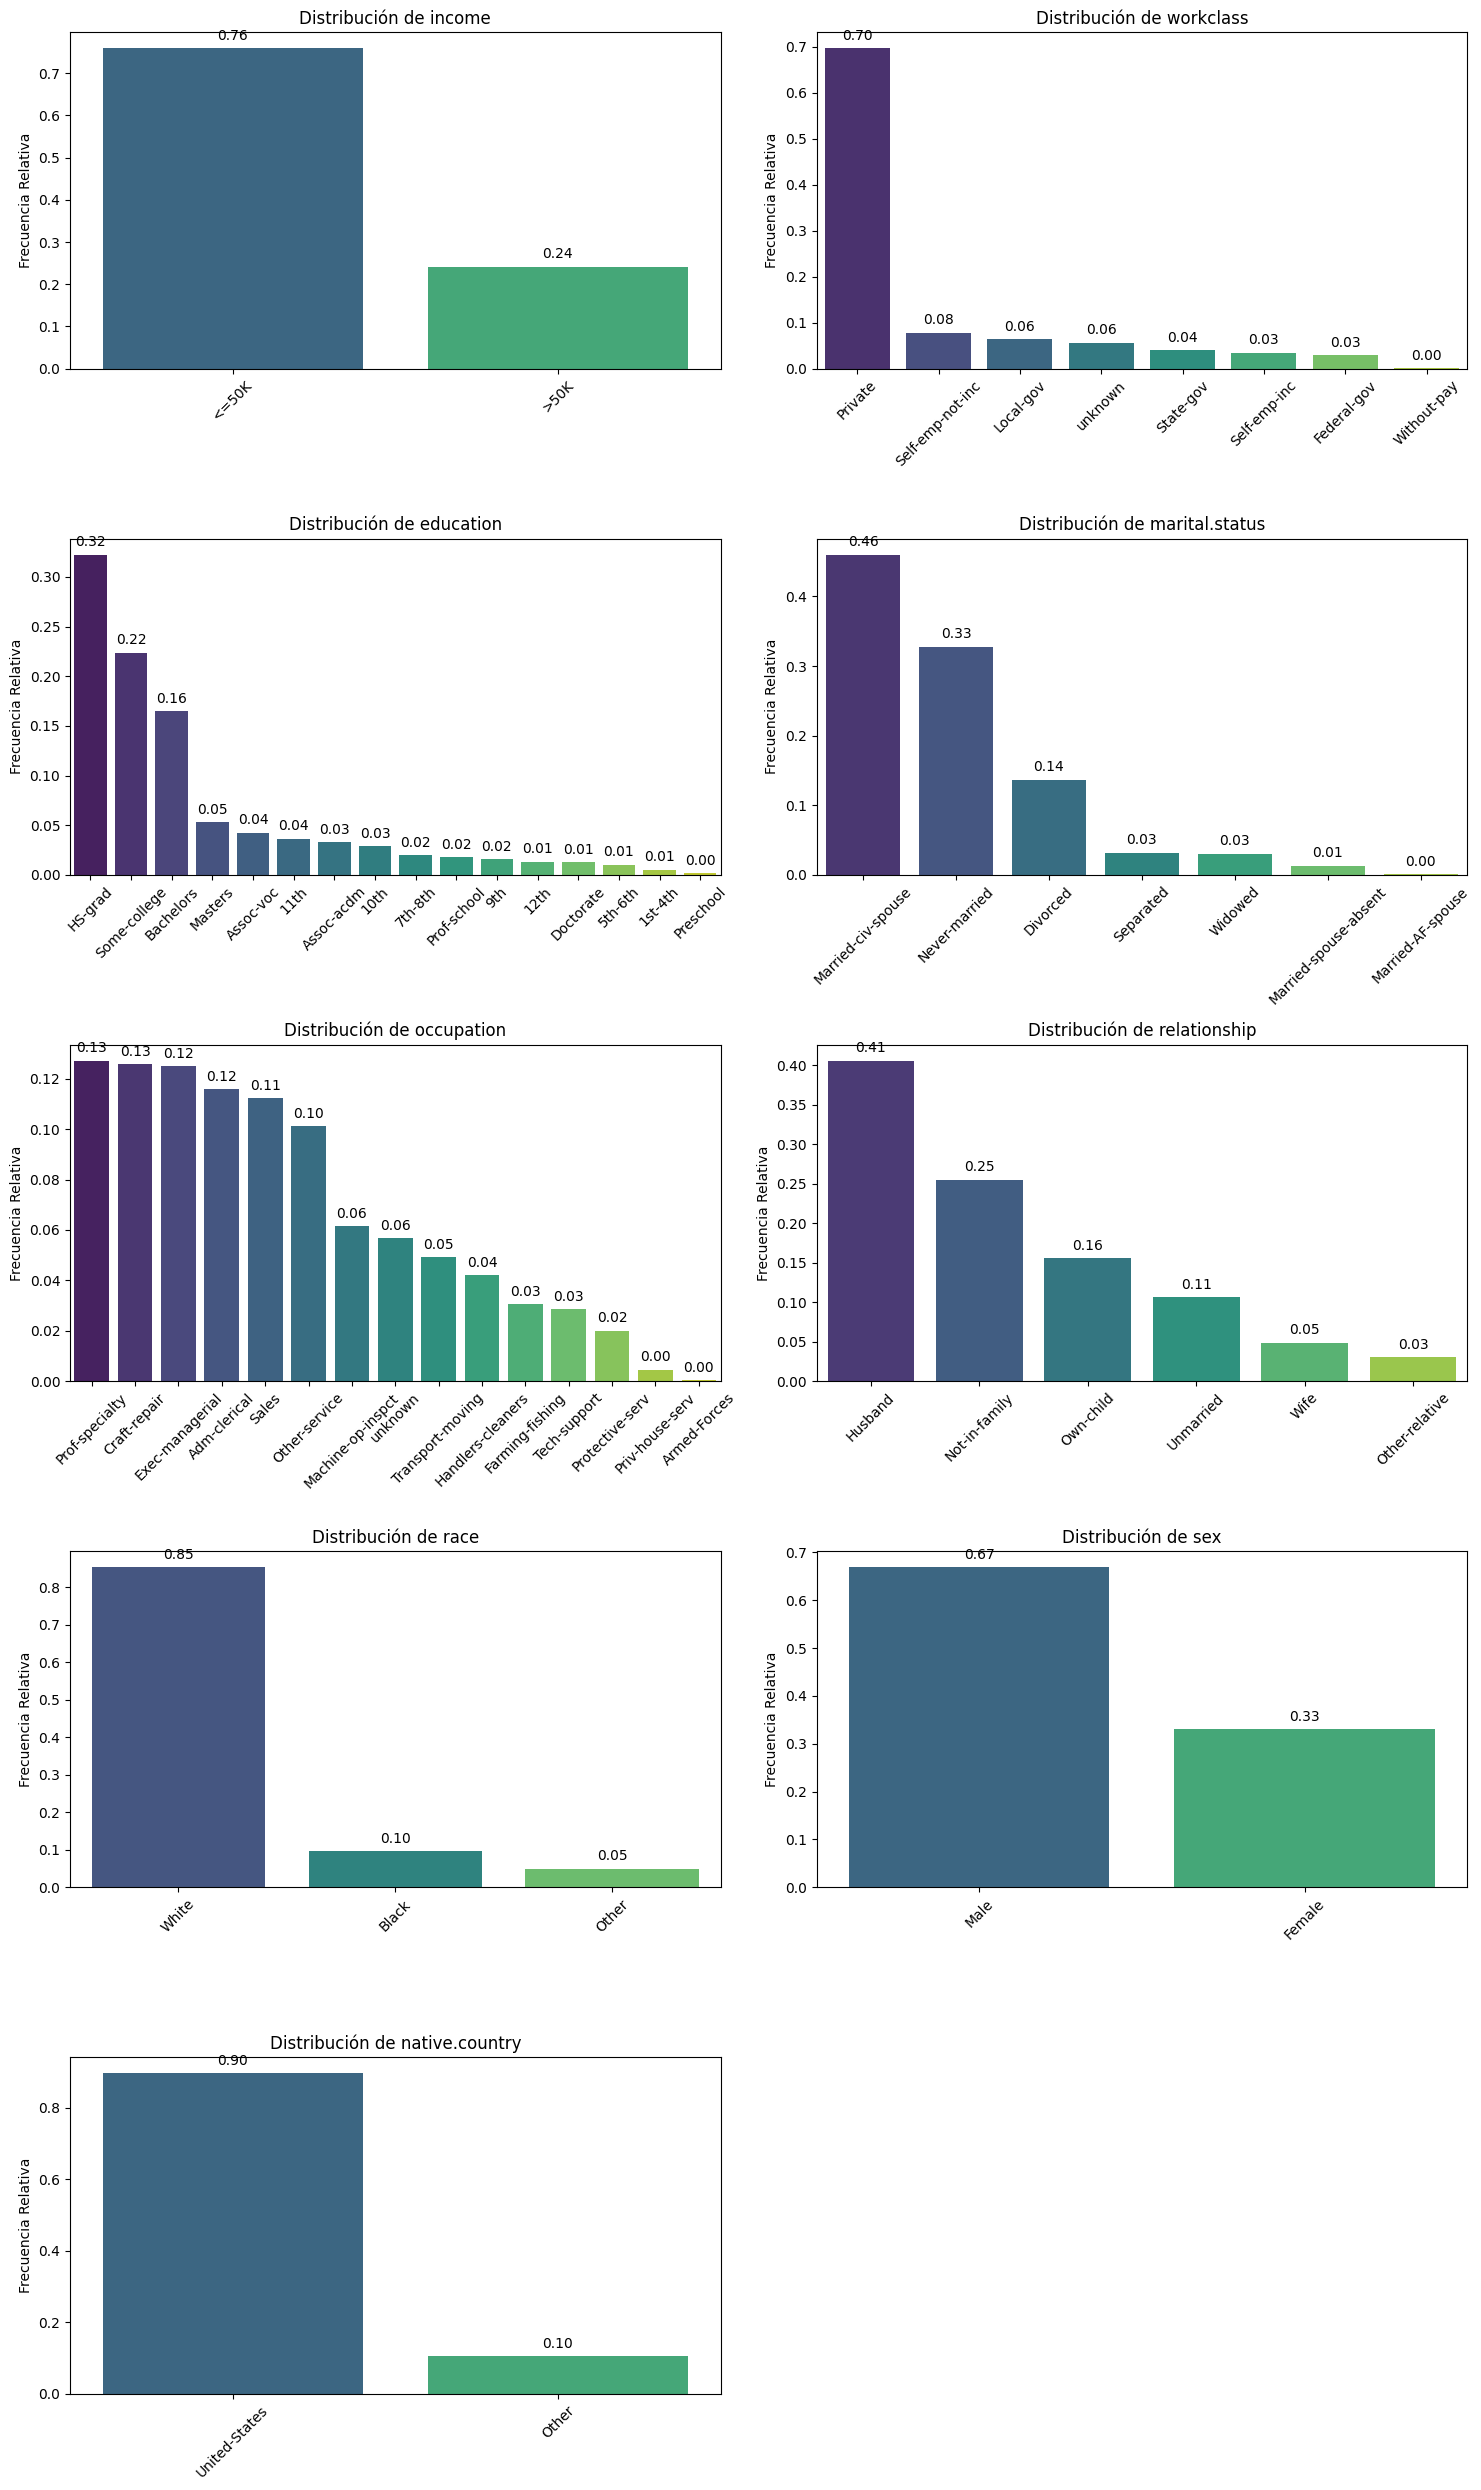

In [14]:
# Show relative frequencies again with changes
pinta_distribucion_categoricas(df_adult_clean,columnas_categoricas,relativa=True,mostrar_valores=True)

### Notas variable categoricas

#### Income:

* Muy desbalanceado, con un 76% que gana menos de 50K y un 24% que gana más de 50K.
* Podría estar relacionado con un menor porcentaje de personas con niveles educativos más altos.

#### Workclass:

* Dominado por el sector privado (70%), y el resto se reparte entre las demás categorías (entre 3% y 8%), siendo el valor without-pay un porcentaje mínimo del total.

#### Education:

* Observamos una mayoría en niveles de estudios medios, siendo HS-Grad, Some-college y Bachelors los más frecuentes.
* La baja proporción de estudios de nivel superior podría explicar la menor cantidad de personas que ganan más de 50K.

#### Marital.status:

* Podría ser interesante analizar cómo se relaciona esta variable con los ingresos. ¿Existe una relación significativa entre el ingreso y el estado civil?

#### Occupation:

* Aquí observamos una distribución algo más equilibrada. Los valores varían entre 0% y 13%, y no hay una categoría que destaque de forma extremadamente dominante.

#### Relationship:

* Se observa un mayor porcentaje del valor Husband y un menor porcentaje del valor Wife. Esto probablemente esté relacionado con el hecho de que, al observar la variable sex, hay aproximadamente el doble de hombres que de mujeres.
* Podría ser interesante analizar si existe una relación entre relationship y el ingreso (por ejemplo, si tener hijos se correlaciona con un menor ingreso, o si está relacionado con personas que ganan más dinero).

#### Race:

* Se observa un claro predominio de la raza White (85%), mientras que Black representa solo el 10% y el 5% restante corresponde a un conjunto de otros grupos étnicos.
* Esto podría dificultar encontrar una correlación significativa entre raza e ingreso debido a la gran diferencia en las frecuencias.

#### Sex:

* Categoría binaria.
* Hay el doble de hombres (67%) que de mujeres (33%).

#### Native.country:

* Dominado por United-States (90%).
* El resto de los países, así como unknown, se agrupan en la categoría Other.


# Analysis Univariante variables numericas

In [15]:
df_adult_clean.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,10.081815,1078.443741,87.368227,40.440329
std,13.637984,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


(5, 2)


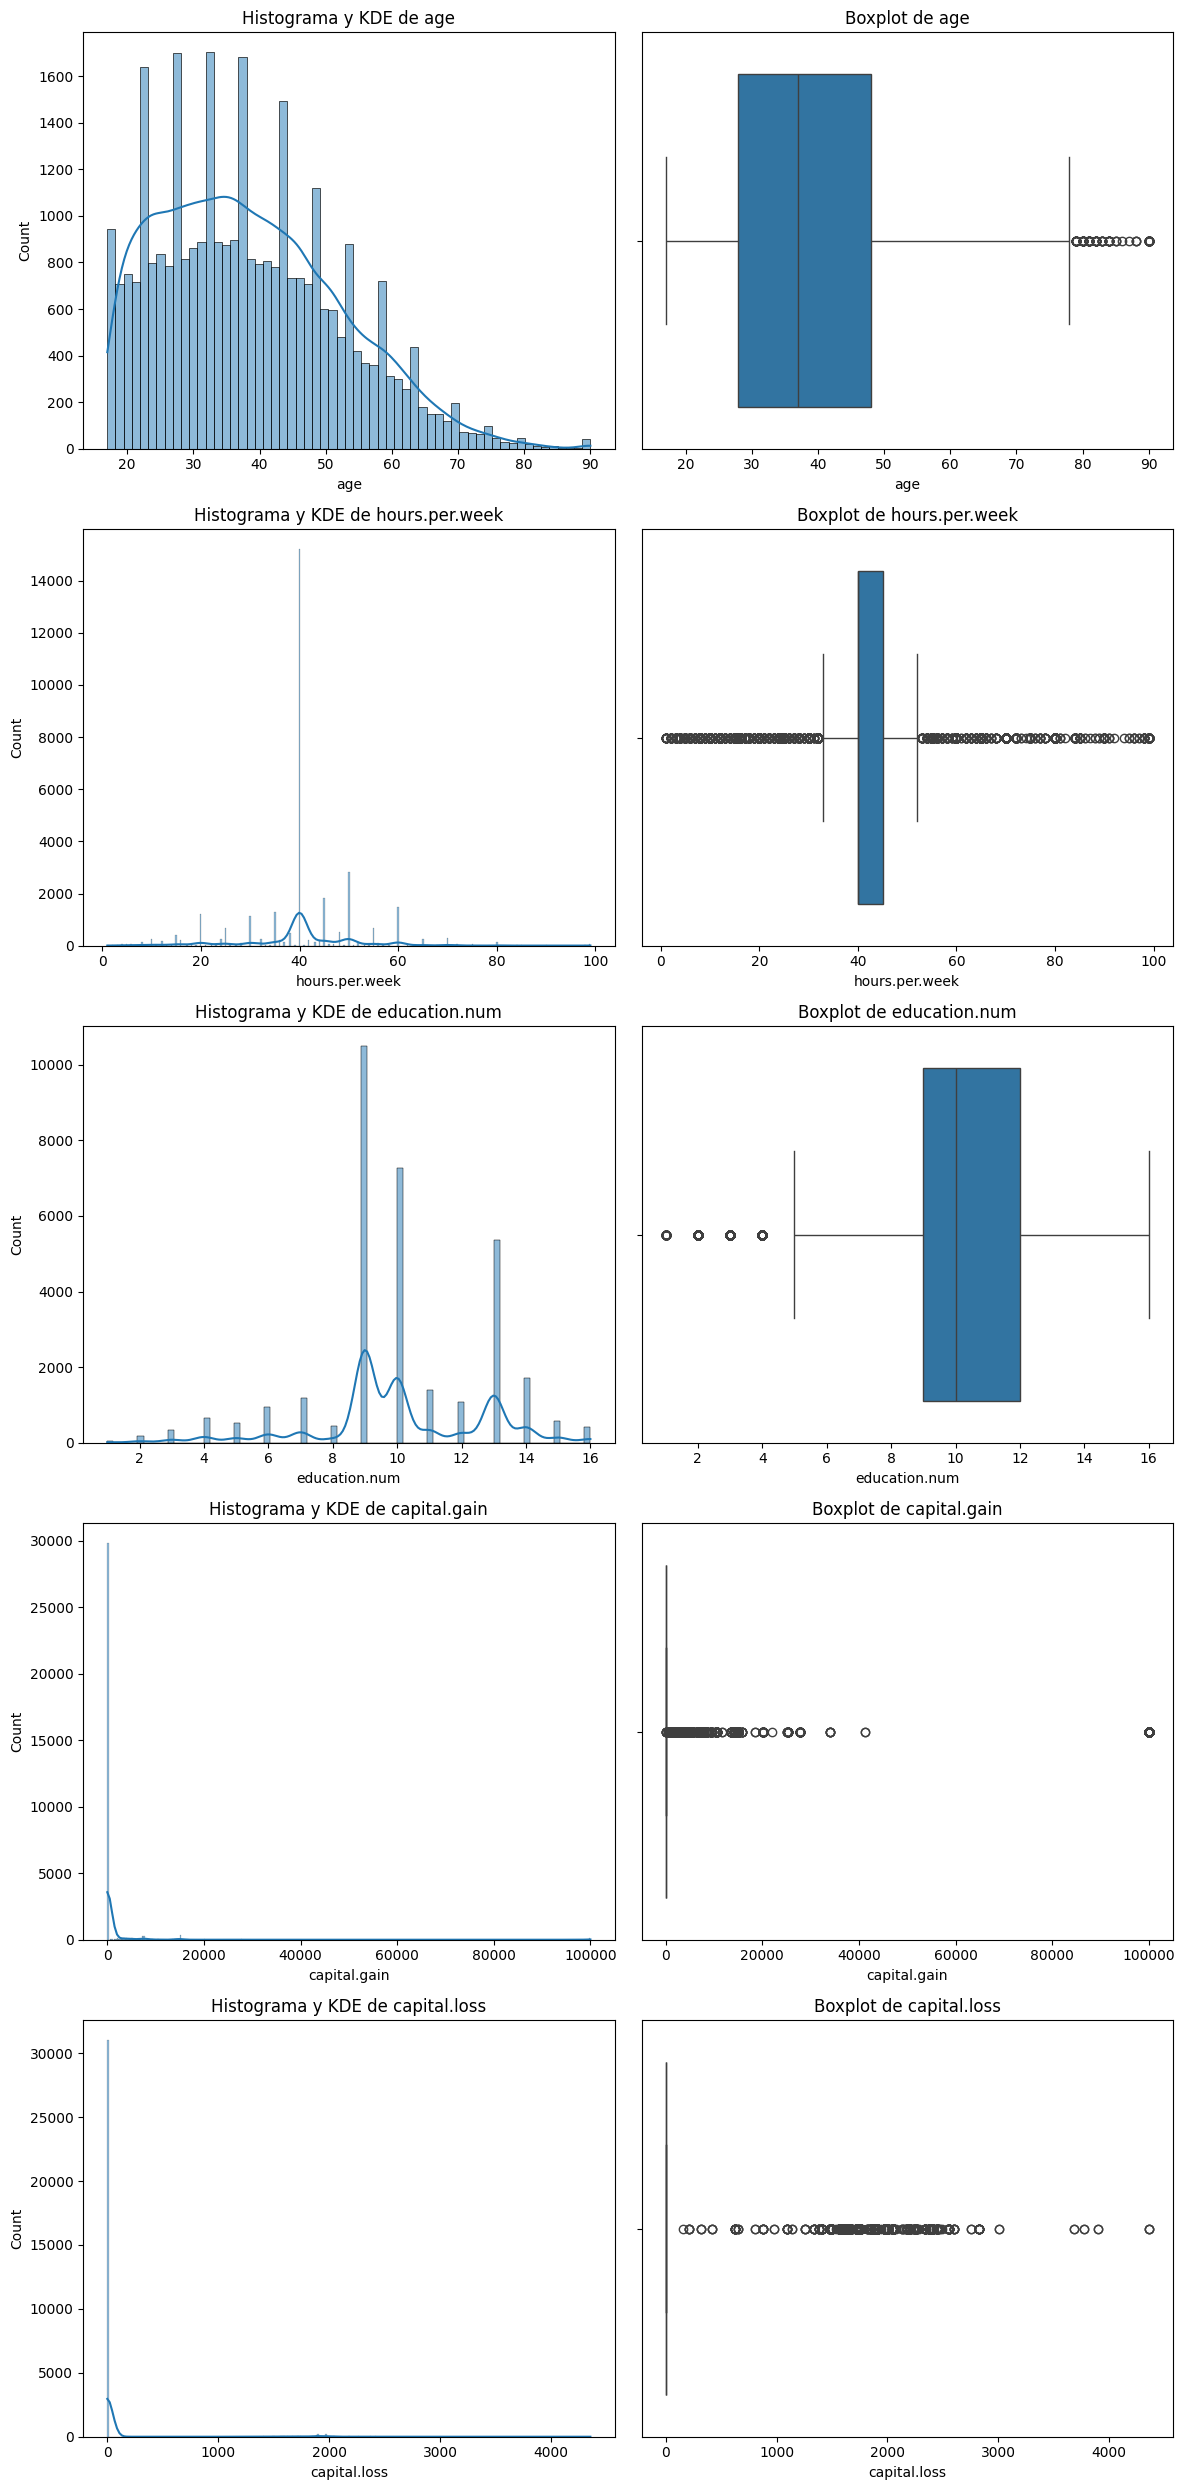

In [16]:
plot_combined_graphs(df_adult_clean,columnas_numericas)

In [17]:
# create new column "binned.hours.per.week"

bins = [0,19,39,40,59,df_adult_clean["hours.per.week"].max()]
labels = ["<20 (part-time)","20-39","40 (full-time)","41-59 (overtime)","60+ (long hours)"]

df_adult_clean["binned.hours.per.week"] = pd.cut(df_adult_clean["hours.per.week"],bins = bins, labels = labels, include_lowest=True)

In [18]:
# create new columns for "has_capital_gains","has_capital_losses"
df_adult_clean["has_capital_gain"] = np.where(df_adult_clean["capital.gain"] > 0, "Yes", "No")
df_adult_clean["has_capital_loss"] = np.where(df_adult_clean["capital.loss"] > 0, "Yes", "No")

In [19]:
columnas_categoricas.append("has_capital_gain")
columnas_categoricas.append("has_capital_loss")

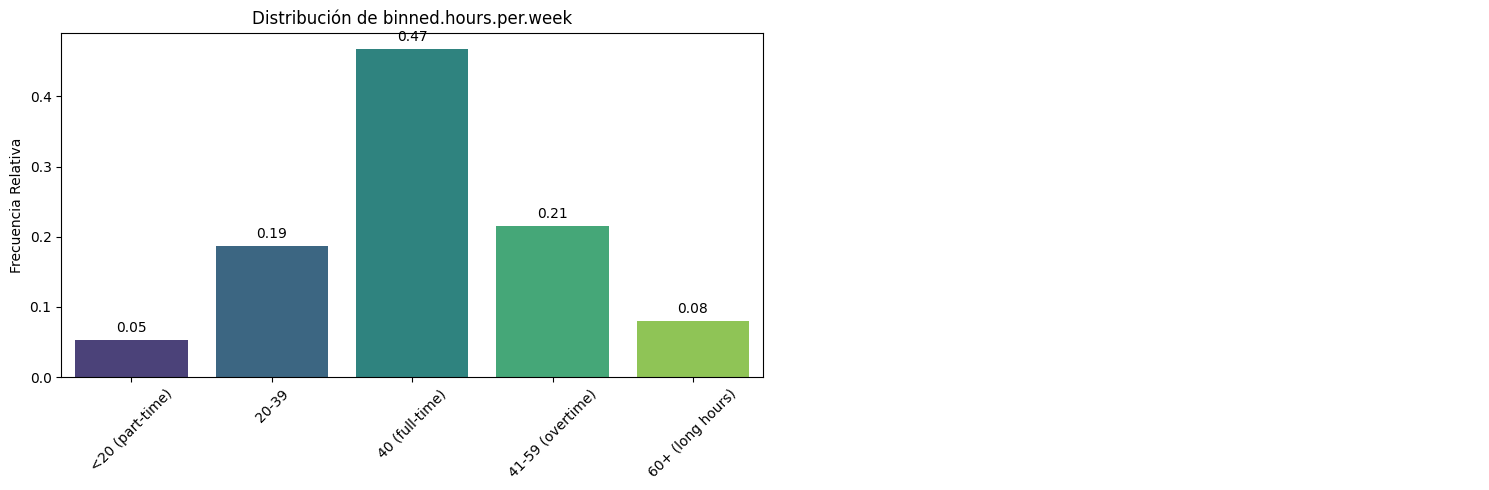

In [21]:
pinta_distribucion_categoricas(df_adult_clean,["binned.hours.per.week"], relativa=True, mostrar_valores=True)

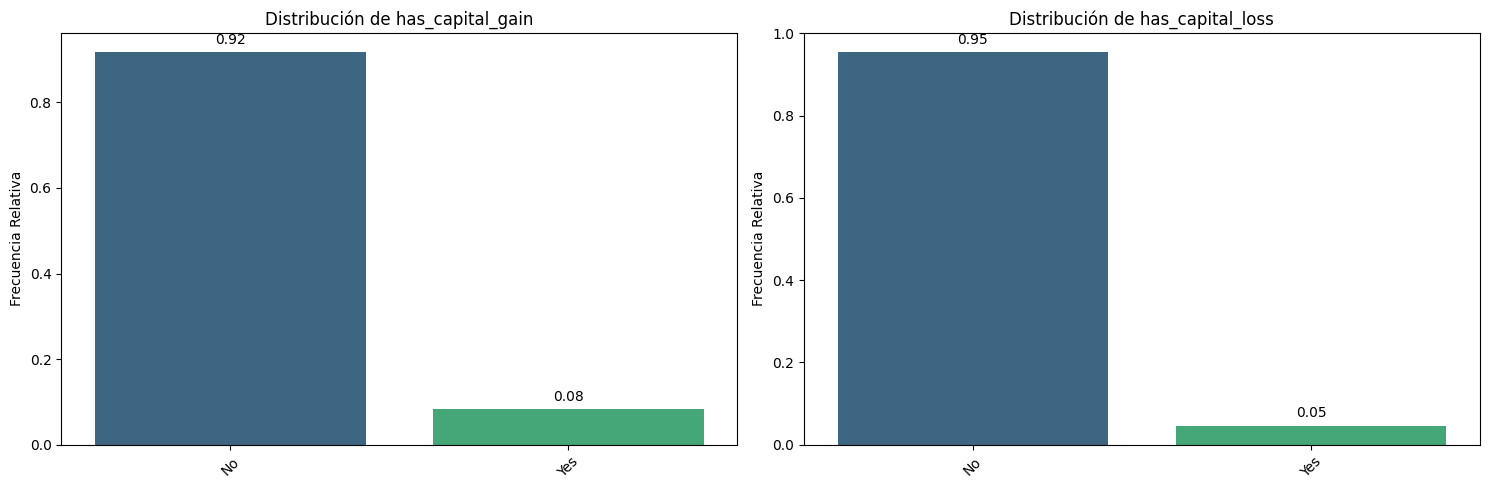

In [ ]:
pinta_distribucion_categoricas(df_adult_clean,["has_capital_gain","has_capital_loss"], relativa=True, mostrar_valores=True)

### Notas sobre variables numéricas

#### age

* La distribución de la edad presenta una asimetría moderada a la derecha, con un pico entre aproximadamente los 25 y 50 años.
* El boxplot muestra algunos valores atípicos en el extremo superior que corresponden a personas de mayor edad, lo cual refleja una variación natural en la población, por lo que no se realizó ninguna transformación.

#### hours.per.week

* El histograma muestra una alta concentración alrededor de las 40 horas semanales, lo que refleja la jornada laboral estándar a tiempo completo.
* El boxplot muestra muchos valores atípicos tanto en horas muy bajas como muy altas, lo que dificulta su interpretación en una escala continua; por ello, se creó una columna agrupada (*binned*) para mejorar la interpretabilidad, manteniendo al mismo tiempo los valores numéricos originales.

#### education.num

* Los picos en el histograma muestran una concentración en niveles educativos específicos, principalmente en niveles educativos intermedios.
* El boxplot muestra valores atípicos en los niveles educativos más bajos, aunque estos corresponden a categorías educativas válidas.

#### capital.gain and capital.loss

* Los gráficos de estas variables presentan una fuerte asimetría a la derecha debido a la alta inflación de ceros y a la presencia de un pequeño número de valores muy elevados.
* Por esta razón, se crearon variables binarias para distinguir a los individuos que presentan alguna ganancia o pérdida de capital de aquellos que no presentan ninguna, lo que permite una mejor interpretación en análisis posteriores.
